In [1]:
import torch
from PIL import Image
from transformers import MllamaForConditionalGeneration, AutoProcessor

/user_data/.local/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
model_path = "llama-3.2-11b-vision-finetuned/checkpoint-840"

model = MllamaForConditionalGeneration.from_pretrained(
    model_path,
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

processor = AutoProcessor.from_pretrained("meta-llama/Llama-3.2-11B-Vision-Instruct")

The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.
Loading checkpoint shards: 100%|██████████| 5/5 [00:05<00:00,  1.01s/it]


In [7]:
def generate_product_description(image_path, processor, model, max_size=(500, 500), max_new_tokens=128):
    image = Image.open(image_path)
    image.thumbnail(max_size)

    promt = """
            You are an expert e-commerce content creator specializing in generating engaging and SEO-optimized product titles and descriptions.

            ### Task
            Analyze the uploaded product image and generate the following output:
            1. **Product Title**: A concise and compelling title that includes key product attributes (e.g., brand, color, material, and type).
            2. **Product Description**: 
            - A concise, mobile-friendly description under 50 words.
            - Include visual details such as color, material, design features, or visible branding.
            - Use SEO-friendly language to maximize search visibility.

            ### Input:
            - Product Image: [Uploaded Image]

            ### Output Example:
            **Product Title**: "Stainless Steel Thermal Water Bottle - 1L, Blue, Leak-Proof Design"  
            **Product Description**: "Keep your drinks hot or cold for 12 hours with this 1L stainless steel thermal water bottle. Featuring a sleek blue finish and a leak-proof design, it’s perfect for outdoor adventures or daily use."
    """
    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image"},
                {"type": "text", "text": promt}
            ],
        }
    ]

    input_text = processor.apply_chat_template(messages, add_generation_prompt=True)

    inputs = processor(
        image,
        input_text,
        add_special_tokens=False,
        return_tensors="pt"
    ).to(model.device)
    
    output = model.generate(**inputs, max_new_tokens=max_new_tokens, temperature=0.001)

    description = processor.decode(output[0, inputs.input_ids.size(1):])
    return description, image

**Product Title:** iPhone 15 - All Colors

**Product Description:** This image showcases the iPhone 15 in all available colors, including black, white, pink, green, blue, and purple. The phone's sleek design and vibrant color options make it a stylish and functional choice for any user.<|eot_id|>


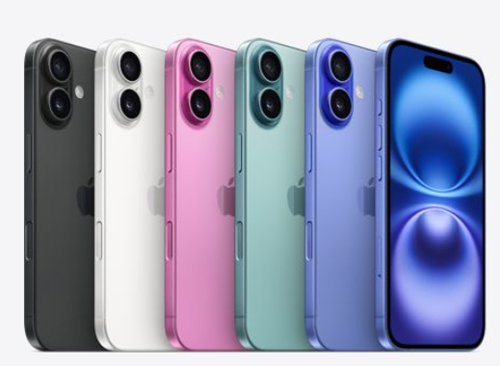

In [8]:
path = "./images/1.png"
description, image = generate_product_description(path, processor, model)
print(description)
image.show()

**Product Title:** Tesla Model 3 - 2023 - White

**Product Description:** This 2023 Tesla Model 3 is a sleek and modern electric vehicle, featuring a white exterior and a spacious interior. With its advanced technology and eco-friendly design, it's the perfect choice for those looking for a stylish and sustainable ride.<|eot_id|>


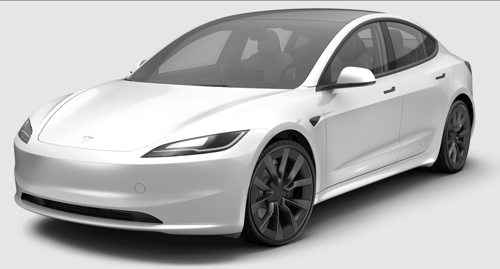

In [9]:
path = "./images/2.png"
description, image = generate_product_description(path, processor, model)
print(description)
image.show()

**Product Title:** Double Cheeseburger with Sesame Seed Bun

**Product Description:** This image features a double cheeseburger with a sesame seed bun, showcasing two patties, cheese, lettuce, and sauce. The burger is presented on a plain background, suggesting it may be a product photo for an online store or advertisement.<|eot_id|>


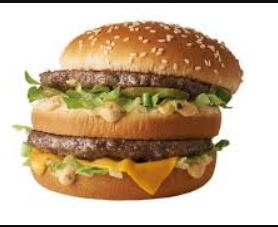

In [10]:
path = "./images/3.png"
description, image = generate_product_description(path, processor, model)
print(description)
image.show()

**Product Title:** Burger Bun with Sesame Seeds

**Product Description:** This image features a person holding a burger bun with sesame seeds, topped with lettuce, tomato, and onion. The bun is golden brown and appears to be freshly baked. The image showcases the bun's texture and details, making it an appealing visual for potential customers.<|eot_id|>


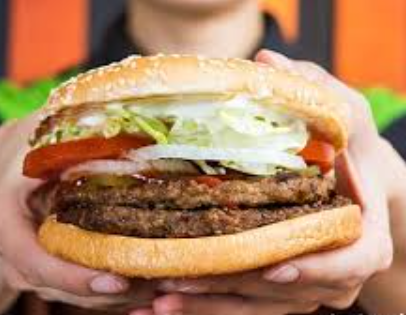

In [11]:
path = "./images/4.png"
description, image = generate_product_description(path, processor, model)
print(description)
image.show()

**Product Title:** Apple Watch Series 8 - 40mm, Gold Aluminum Case with Pink Sand Sport Band

**Product Description:** Keep track of your health and fitness with the Apple Watch Series 8, featuring a 40mm gold aluminum case and pink sand sport band. This smartwatch offers advanced health monitoring, GPS tracking, and seamless integration with your iPhone. Stay connected and active with this stylish and functional timepiece.<|eot_id|>


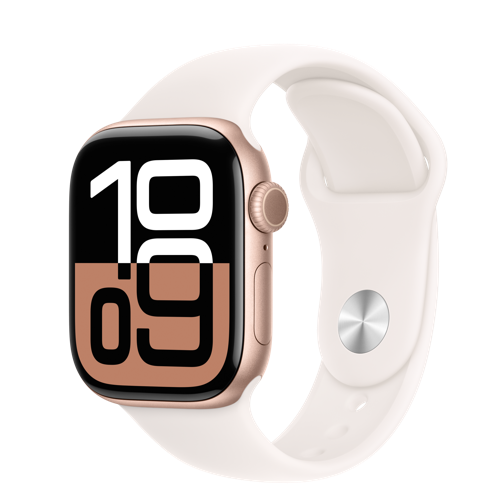

In [12]:
path = "./images/5.png"
description, image = generate_product_description(path, processor, model)
print(description)
image.show()